In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [2]:
df=pd.read_csv('Crimes_-_One_year_prior_to_present.csv')
df

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD164115,02/25/2020 10:20:00 AM,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)"
1,JD163938,02/25/2020 05:30:00 AM,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)"
2,JC164345,02/25/2020 01:04:00 PM,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)"
3,JD164701,02/25/2020 06:05:00 PM,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)"
4,JD164416,02/25/2020 01:42:00 PM,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203665,JD430516,10/25/2020 12:00:00 PM,029XX N MELVINA AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,N,N,2511,30.0,11,1134560.0,1918918.0,41.933710,-87.780916,"(41.933709921, -87.780916246)"
203666,JD430452,11/07/2020 10:00:00 PM,011XX S MICHIGAN AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL / MOTEL,N,N,123,4.0,02,1177417.0,1895669.0,41.869048,-87.624126,"(41.869047845, -87.624125523)"
203667,JD434095,11/17/2020 04:15:00 PM,047XX N KEDZIE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,N,N,1713,33.0,08A,1154189.0,1931371.0,41.967512,-87.708446,"(41.967512085, -87.708446268)"
203668,JD453566,12/08/2020 07:22:00 PM,037XX N RECREATION DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,PARK PROPERTY,N,Y,1925,46.0,08B,1171826.0,1925510.0,41.951058,-87.643771,"(41.951058037, -87.643770543)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203670 entries, 0 to 203669
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   203670 non-null  object 
 1   DATE  OF OCCURRENCE     203670 non-null  object 
 2   BLOCK                   203670 non-null  object 
 3    IUCR                   203670 non-null  object 
 4    PRIMARY DESCRIPTION    203670 non-null  object 
 5    SECONDARY DESCRIPTION  203670 non-null  object 
 6    LOCATION DESCRIPTION   202556 non-null  object 
 7   ARREST                  203670 non-null  object 
 8   DOMESTIC                203670 non-null  object 
 9   BEAT                    203670 non-null  int64  
 10  WARD                    203660 non-null  float64
 11  FBI CD                  203670 non-null  object 
 12  X COORDINATE            202379 non-null  float64
 13  Y COORDINATE            202379 non-null  float64
 14  LATITUDE            

In [4]:
df.isnull().sum()

CASE#                        0
DATE  OF OCCURRENCE          0
BLOCK                        0
 IUCR                        0
 PRIMARY DESCRIPTION         0
 SECONDARY DESCRIPTION       0
 LOCATION DESCRIPTION     1114
ARREST                       0
DOMESTIC                     0
BEAT                         0
WARD                        10
FBI CD                       0
X COORDINATE              1291
Y COORDINATE              1291
LATITUDE                  1291
LONGITUDE                 1291
LOCATION                  1291
dtype: int64

In [5]:
from datetime import date

In [6]:
df.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [7]:
df.drop(['CASE#',' IUCR'],axis=1,inplace=True)

In [8]:
df['DATE  OF OCCURRENCE']=pd.to_datetime(df['DATE  OF OCCURRENCE'])


In [9]:
df['date'] = df['DATE  OF OCCURRENCE'].dt.date

In [10]:
df['year'] = df['DATE  OF OCCURRENCE'].dt.year

In [11]:
df['month'] = df['DATE  OF OCCURRENCE'].dt.month

In [12]:
df['day'] = df['DATE  OF OCCURRENCE'].dt.day

In [13]:
df['hour'] = df['DATE  OF OCCURRENCE'].dt.hour

In [14]:
df['minute'] = df['DATE  OF OCCURRENCE'].dt.minute

In [15]:
df['day_name']=df['DATE  OF OCCURRENCE'].dt.day_name()

In [16]:
df.head()

,DATE OF OCCURRENCE,BLOCK,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,...,LATITUDE,LONGITUDE,LOCATION,date,year,month,day,hour,minute,day_name
0,2020-02-25 10:20:00,013XX S CANAL ST,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,...,41.864494,-87.639158,"(41.864493678, -87.639158)",2020-02-25,2020,2,25,10,20,Tuesday
1,2020-02-25 05:30:00,033XX W CULLOM AVE,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,...,41.959340,-87.711475,"(41.959339811, -87.711474784)",2020-02-25,2020,2,25,5,30,Tuesday
2,2020-02-25 13:04:00,023XX S PULASKI RD,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,...,41.848475,-87.724676,"(41.848474762, -87.724676285)",2020-02-25,2020,2,25,13,4,Tuesday
3,2020-02-25 18:05:00,058XX N RIDGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,...,41.987716,-87.666750,"(41.987716355, -87.666750459)",2020-02-25,2020,2,25,18,5,Tuesday
4,2020-02-25 13:42:00,011XX N HARDING AVE,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,...,41.901353,-87.725041,"(41.901352928, -87.725041269)",2020-02-25,2020,2,25,13,42,Tuesday


In [17]:
for col in df.columns:
    print (f'name is {col}')
    print(df[col].value_counts())
    print('\n')

name is DATE  OF OCCURRENCE
2020-05-31 16:00:00    90
2020-05-31 15:00:00    79
2020-05-31 21:00:00    58
2020-05-31 14:00:00    55
2020-05-30 22:00:00    52
                       ..
2021-01-12 10:19:00     1
2020-08-20 20:45:00     1
2020-10-25 15:10:00     1
2020-07-02 14:11:00     1
2020-10-05 09:55:00     1
Name: DATE  OF OCCURRENCE, Length: 105916, dtype: int64


name is BLOCK
001XX N STATE ST                       405
0000X W TERMINAL ST                    247
064XX S DR MARTIN LUTHER KING JR DR    227
008XX N MICHIGAN AVE                   194
033XX W FILLMORE ST                    154
                                      ... 
029XX N RUTHERFORD AVE                   1
034XX N Keeler Ave                       1
054XX S LAKE SHORE DR NB                 1
018XX N HALSTED ST                       1
081XX S HONORE ST                        1
Name: BLOCK, Length: 27104, dtype: int64


name is  PRIMARY DESCRIPTION
BATTERY                              40255
THEFT                     

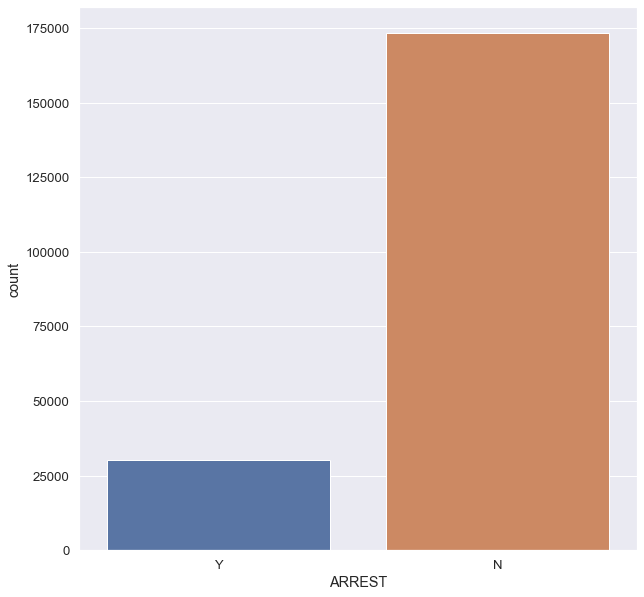

In [18]:
sns.countplot(df['ARREST'])

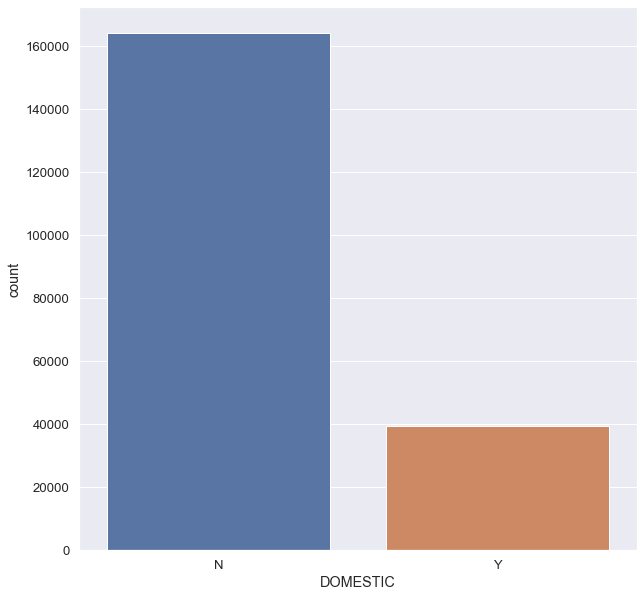

In [19]:
sns.countplot(df['DOMESTIC'])

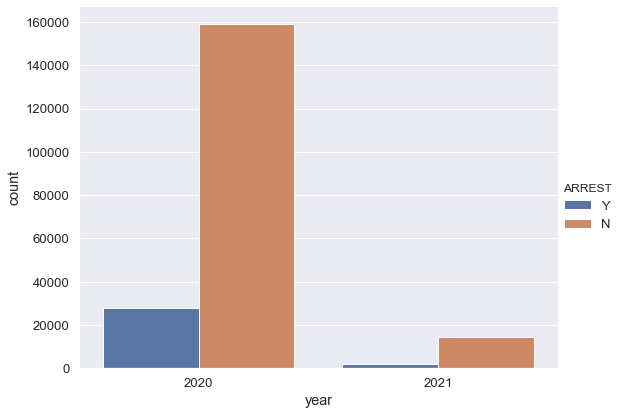

In [20]:
sns.catplot(x="year", data=df, height=6, aspect=1.3, kind="count", hue='ARREST')

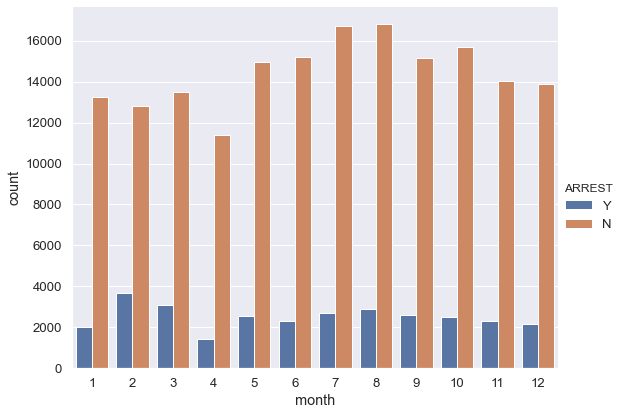

In [21]:
sns.catplot(x="month", data=df, height=6, aspect=1.3, kind="count", hue='ARREST')

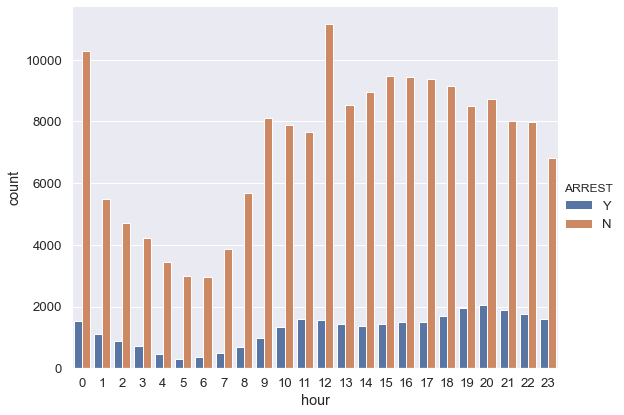

In [22]:
sns.catplot(x="hour",data=df, height=6, aspect=1.3,kind="count",hue='ARREST')

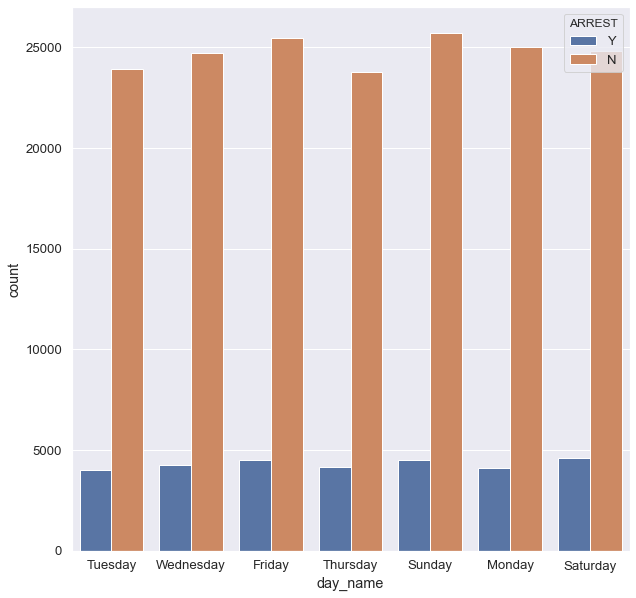

In [24]:
sns.countplot(x="day_name",data=df,hue='ARREST')

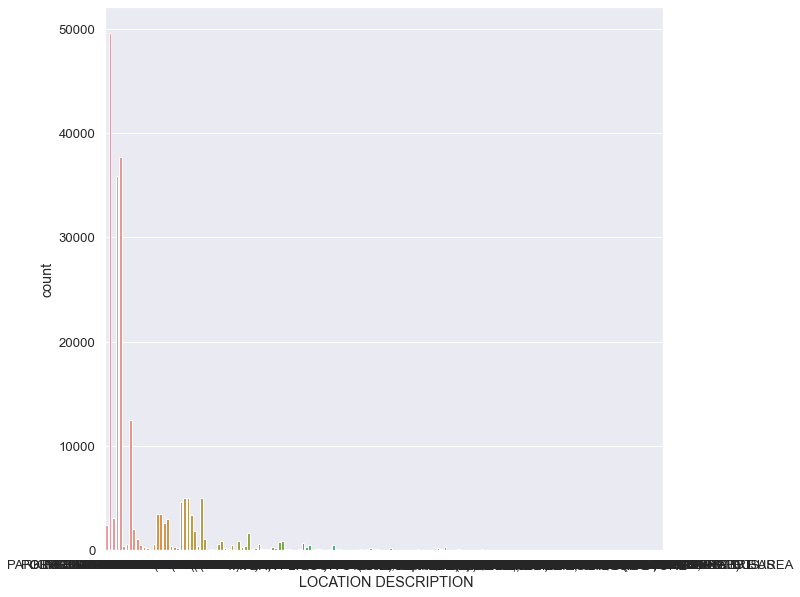

In [31]:
sns.countplot(x=" LOCATION DESCRIPTION",data=df)

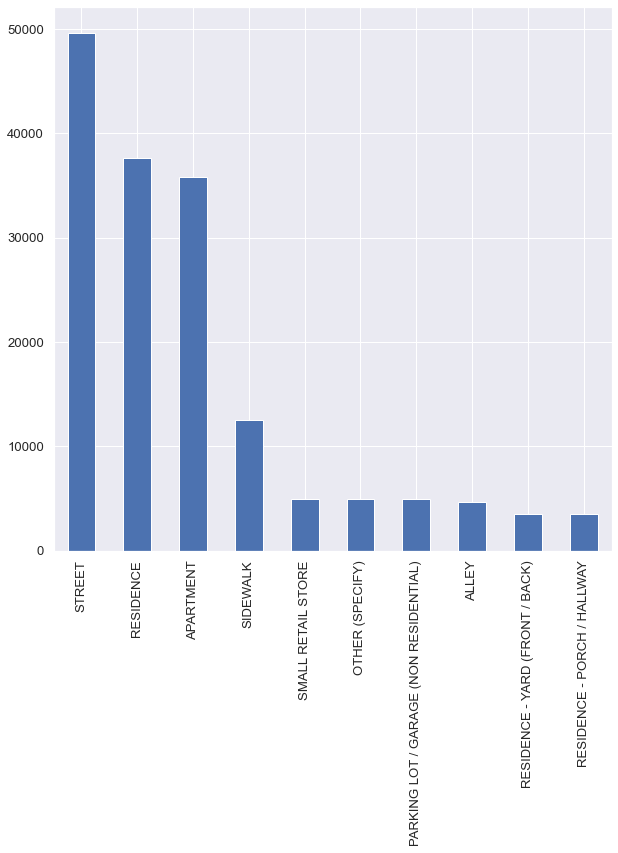

In [35]:
f=df[' LOCATION DESCRIPTION'].value_counts().nlargest(10)
f.plot(kind="bar")

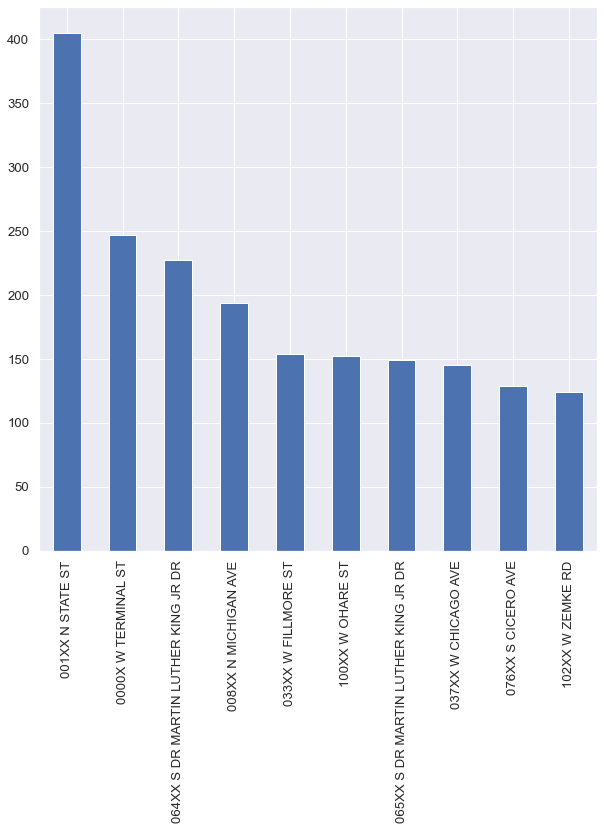

In [37]:
pl=df['BLOCK'].value_counts().nlargest(10)
pl.plot(kind="bar")

In [27]:
df.groupby(['day_name']).size()

day_name
Friday       29994
Monday       29138
Saturday     29439
Sunday       30233
Thursday     27954
Tuesday      27937
Wednesday    28975
dtype: int64

In [33]:
df.groupby(['hour']).size()

hour
0     11813
1      6591
2      5585
3      4939
4      3922
5      3311
6      3304
7      4360
8      6377
9      9101
10     9215
11     9266
12    12723
13     9973
14    10316
15    10922
16    10920
17    10868
18    10859
19    10460
20    10776
21     9888
22     9761
23     8420
dtype: int64

In [53]:
df.head()

,DATE OF OCCURRENCE,BLOCK,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,...,LATITUDE,LONGITUDE,LOCATION,date,year,month,day,hour,minute,day_name
0,2020-02-25 10:20:00,013XX S CANAL ST,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,...,41.864494,-87.639158,"(41.864493678, -87.639158)",2020-02-25,2020,2,25,10,20,Tuesday
1,2020-02-25 05:30:00,033XX W CULLOM AVE,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,...,41.959340,-87.711475,"(41.959339811, -87.711474784)",2020-02-25,2020,2,25,5,30,Tuesday
2,2020-02-25 13:04:00,023XX S PULASKI RD,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,...,41.848475,-87.724676,"(41.848474762, -87.724676285)",2020-02-25,2020,2,25,13,4,Tuesday
3,2020-02-25 18:05:00,058XX N RIDGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,...,41.987716,-87.666750,"(41.987716355, -87.666750459)",2020-02-25,2020,2,25,18,5,Tuesday
4,2020-02-25 13:42:00,011XX N HARDING AVE,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,...,41.901353,-87.725041,"(41.901352928, -87.725041269)",2020-02-25,2020,2,25,13,42,Tuesday


In [55]:
df.columns

Index(['DATE  OF OCCURRENCE', 'BLOCK', ' PRIMARY DESCRIPTION',
       ' SECONDARY DESCRIPTION', ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC',
       'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'date', 'year', 'month', 'day', 'hour',
       'minute', 'day_name'],
      dtype='object')

In [45]:
import folium
from folium import plugins

In [46]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [61]:
locations = df.groupby('WARD').first()
new_locations = locations.loc[:, ['LATITUDE', 'LONGITUDE', ' PRIMARY DESCRIPTION', 'ARREST','DOMESTIC']]
new_locations.head(20)


,LATITUDE,LONGITUDE,PRIMARY DESCRIPTION,ARREST,DOMESTIC
WARD,,,,,
1.0,41.922547,-87.696785,BATTERY,N,N
2.0,41.899251,-87.621459,DECEPTIVE PRACTICE,N,N
3.0,41.805264,-87.618051,THEFT,N,N
4.0,41.801896,-87.587692,CRIMINAL DAMAGE,N,N
5.0,41.772027,-87.591139,ASSAULT,N,N
6.0,41.737751,-87.604856,CRIMINAL TRESPASS,Y,N
7.0,41.760347,-87.561175,DECEPTIVE PRACTICE,N,N
8.0,41.765745,-87.588550,MOTOR VEHICLE THEFT,N,N
9.0,41.697338,-87.606096,THEFT,N,N


In [62]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [59]:
chicago_map

In [39]:
df.head()

,DATE OF OCCURRENCE,BLOCK,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,...,LATITUDE,LONGITUDE,LOCATION,date,year,month,day,hour,minute,day_name
0,2020-02-25 10:20:00,013XX S CANAL ST,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,...,41.864494,-87.639158,"(41.864493678, -87.639158)",2020-02-25,2020,2,25,10,20,Tuesday
1,2020-02-25 05:30:00,033XX W CULLOM AVE,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,...,41.959340,-87.711475,"(41.959339811, -87.711474784)",2020-02-25,2020,2,25,5,30,Tuesday
2,2020-02-25 13:04:00,023XX S PULASKI RD,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,...,41.848475,-87.724676,"(41.848474762, -87.724676285)",2020-02-25,2020,2,25,13,4,Tuesday
3,2020-02-25 18:05:00,058XX N RIDGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,...,41.987716,-87.666750,"(41.987716355, -87.666750459)",2020-02-25,2020,2,25,18,5,Tuesday
4,2020-02-25 13:42:00,011XX N HARDING AVE,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,...,41.901353,-87.725041,"(41.901352928, -87.725041269)",2020-02-25,2020,2,25,13,42,Tuesday


In [40]:
df.isnull().sum()

DATE  OF OCCURRENCE          0
BLOCK                        0
 PRIMARY DESCRIPTION         0
 SECONDARY DESCRIPTION       0
 LOCATION DESCRIPTION     1114
ARREST                       0
DOMESTIC                     0
BEAT                         0
WARD                        10
FBI CD                       0
X COORDINATE              1291
Y COORDINATE              1291
LATITUDE                  1291
LONGITUDE                 1291
LOCATION                  1291
date                         0
year                         0
month                        0
day                          0
hour                         0
minute                       0
day_name                     0
dtype: int64

In [41]:
df.columns

Index(['DATE  OF OCCURRENCE', 'BLOCK', ' PRIMARY DESCRIPTION',
       ' SECONDARY DESCRIPTION', ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC',
       'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'date', 'year', 'month', 'day', 'hour',
       'minute', 'day_name'],
      dtype='object')

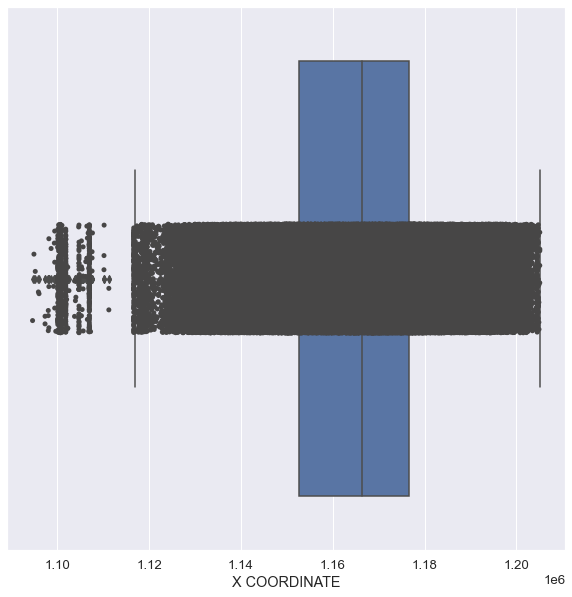

In [42]:
sns.boxplot(x='X COORDINATE', data=df)
sns.stripplot(x='X COORDINATE', data=df, color="#474646")

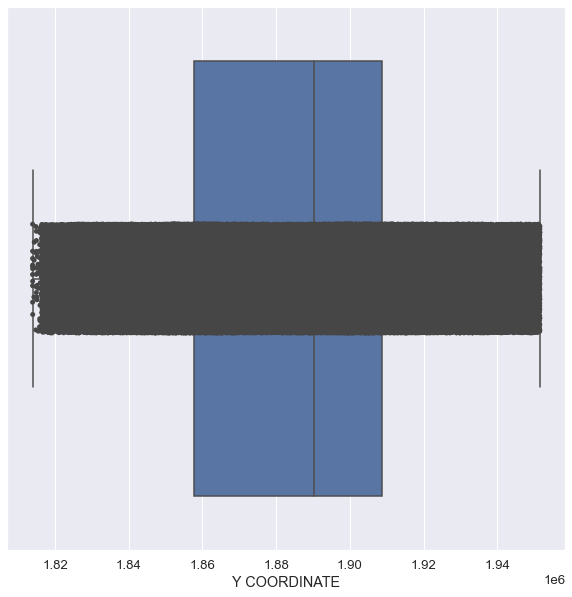

In [43]:
sns.boxplot(x='Y COORDINATE', data=df)
sns.stripplot(x='Y COORDINATE', data=df, color="#474646")

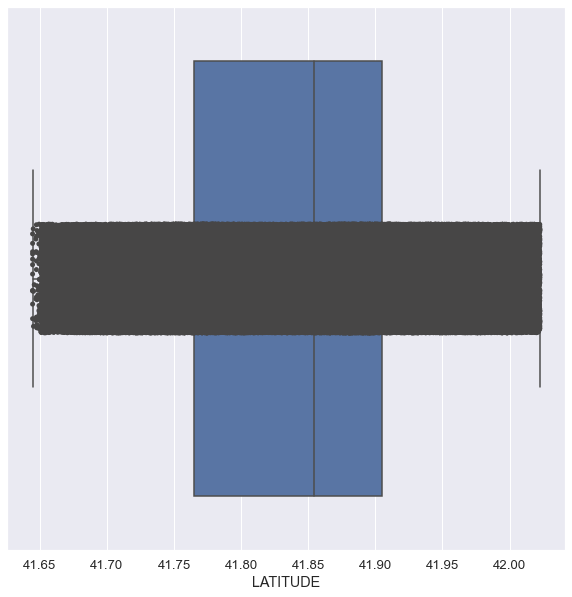

In [44]:
sns.boxplot(x='LATITUDE', data=df)
sns.stripplot(x='LATITUDE', data=df, color="#474646")